**Importing the Libraries**

In [286]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline             
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

**Bringing the Data_set into our working Environment**

In [287]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")

In [288]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [289]:
df1.shape

(13320, 9)

In [290]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

**Data Pre-Processing Phase Starts**

*   Removing the redundant features



In [291]:
df2 = df1.drop(['area_type','society','availability'], axis ='columns')

In [292]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


*   checking the Null Values and drop it




In [293]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [294]:
df3 = df2.dropna()

In [295]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [296]:
df3.shape

(12710, 6)

*   Exploring the 'size' feature in the Data Frame




In [297]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

**Feature Engineering** - Beauty of Feature Extraction:
    We are extracting 'bhk' by Applying Lamba Expression as we do not have a common format of 'BHK'.

In [298]:
df3.loc[:,'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-298-081af2a55104>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


**We can see the Unique Features of 'bhk' Created Column**

In [299]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [300]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [301]:
df3['balcony'].unique()

array([1., 3., 2., 0.])

In [302]:
df3.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [303]:
df3[df3.bhk >20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [304]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**is_float function to Check the Total_sqft Values in range xxx1-xxx2 or if it is float**

In [305]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [306]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [307]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [308]:
df3.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [309]:
df4 = df3.copy()

In [310]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**Considering the Float Values and Converting the Values of 'Sq.Meters' to 'Sq.Feet' in total_sqft Feature**

In [311]:
def conver_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    elif "Sq. Meter" in x:
        x = x.replace('Sq. Meter'," ")
        return (float(x))*10.7639
    try:
        return float(x)
    except:
        return None

In [312]:
df4['total_sqft'] = df4['total_sqft'].apply(conver_sqft_to_num)

In [313]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [314]:
df4.loc[410]

location         Kengeri
size               1 BHK
total_sqft    370.923994
bath                 1.0
balcony              0.0
price               18.5
bhk                    1
Name: 410, dtype: object

In [315]:
df4.groupby('total_sqft')['total_sqft'].agg('count')

total_sqft
5.000        1
11.000       1
15.000       1
24.000       1
45.000       1
            ..
32722.256    1
35000.000    1
36000.000    1
42000.000    1
52272.000    1
Name: total_sqft, Length: 1902, dtype: int64

In [316]:
df4.dtypes

location       object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

In [317]:
df4.shape

(12710, 7)

In [318]:
df4['total_sqft'].unique

<bound method Series.unique of 0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 12710, dtype: float64>

In [319]:
df5 = df4.copy()

**An Important aspect of Real_estate(i.e) Price_Per_Sqft feature extraction for our Analysis**

In [320]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [379]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [322]:
df5['location'].unique

<bound method Series.unique of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 12710, dtype: object>

In [323]:
len(df5.location.unique())

1265

In [380]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


**To Remove any lead or Trail White Space in 'location' field**

In [325]:
df5.location = df5.location.apply(lambda x: x.strip())

In [326]:
df5.groupby('location')['location'].agg('count')

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1254, dtype: int64

**Sorting the Result Count of Location**

In [327]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [328]:
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [329]:
len(location_stats[location_stats <= 10])

1017

In [330]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [331]:
location_stats_less_than_10

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [332]:
len(df5.location.unique())

1254

In the below expression is what we are applying the **Dimensionality Reduction**
"We are reducing the **Dimension of Location**.

In [333]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

**Creation of new sub-feature 'other' in the Location Column which has less than 10 locations and aggregating it to the 'other' feature using the above Lambda Expression**

In [334]:
len(df5.location.unique())

238

In [335]:
df5.groupby('location')['location'].agg('count')

location
1st Block Jayanagar            12
1st Phase JP Nagar             22
2nd Phase Judicial Layout      11
2nd Stage Nagarbhavi           23
5th Phase JP Nagar             37
                             ... 
Yelahanka                     206
Yelahanka New Town             41
Yelenahalli                    12
Yeshwanthpur                   78
other                        2739
Name: location, Length: 238, dtype: int64

In [336]:
df5['location'].unique

<bound method Series.unique of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 12710, dtype: object>

In [381]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [338]:
df5.groupby('location')['location'].agg('count')

location
1st Block Jayanagar            12
1st Phase JP Nagar             22
2nd Phase Judicial Layout      11
2nd Stage Nagarbhavi           23
5th Phase JP Nagar             37
                             ... 
Yelahanka                     206
Yelahanka New Town             41
Yelenahalli                    12
Yeshwanthpur                   78
other                        2739
Name: location, Length: 238, dtype: int64

In [382]:
df5[df5.total_sqft/df5.bhk <300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [340]:
df5.shape

(12710, 8)

In [341]:
df6 = df5[~(df5.total_sqft/df5.bhk <300)]

In [342]:
df6.shape

(12054, 8)

In [343]:
df6.dtypes

location           object
size               object
total_sqft        float64
bath              float64
balcony           float64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object

In [344]:
df6.price_per_sqft.describe()

count     12029.000000
mean       6203.461615
std        3984.948083
min         267.829813
25%        4199.019608
50%        5252.246026
75%        6824.712644
max      176470.588235
Name: price_per_sqft, dtype: float64

The Beauty of the below expression is that the **Statistical Analysis** has been performed over the **'Price_per_sqft' feature**. 
All it does is, considering the Data under the **'Normal Distribution'**. We concentrate on the Values of Mean and the S.D as per **Empirical Rule**.


**Empirical Rule:**
     
1 S.D----Mean----1 SD -> 68%,

2 S.D-------Mean-------2 S.D -> 95%,

3 S.D---------Mean----------3 S.D -> 99.7%

In [345]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    stand_dev = np.std(subdf.price_per_sqft)
    reduced_df = subdf[((subdf.price_per_sqft) > (m-stand_dev)) & ((subdf.price_per_sqft) < (m+stand_dev))]
    df_out = pd.concat([df_out,reduced_df], ignore_index = True)
  return df_out

In [346]:
df7 = remove_pps_outliers(df6)
df7.shape

(9864, 8)

**Applying the Visualization Analysis to check if the Price_per_sqft and total_sqft_area matches the bhk.**

In [347]:
def plot_scatter(df,location):
  bhk2 = df[(df.location == location) & (df.bhk ==2)]
  bhk3 = df[(df.location == location) & (df.bhk ==3)]
  matplotlib.rcParams['figure.figsize'] = (7,3)
  plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color ='blue',s = 50, label ='2BHK')
  plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color ='green', marker = '*', label ='3BHK', s=50)
  plt.xlabel('total sqft Area')
  plt.ylabel('price per sqft')
  plt.title('location')
  plt.legend()


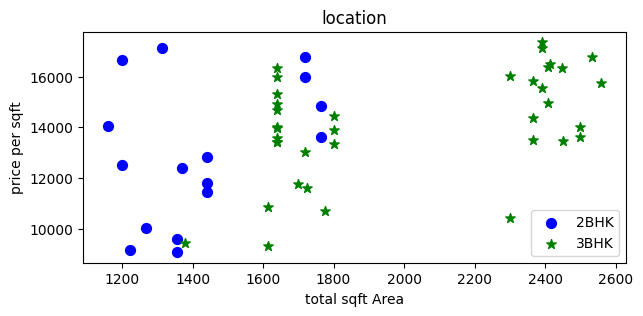

In [348]:
plot_scatter(df7,"Rajaji Nagar")

**If we see the pictures above and below, it shows how 3BHK and 2BHK overlaps being independent of their price_per_sqft and total_sqft_area**

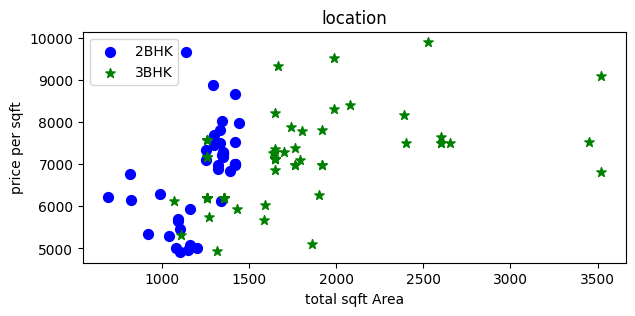

In [349]:
plot_scatter(df7,"Hebbal")

Aggregating the BHK of the similiar location, 
considering 5 data points of the the BHK of similar type,
We take the Mean and check if that statistics satistfies the PPS for 
'bhk' and 'bhk-1'.

In [350]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = { 
          'mean' : np.mean(bhk_df.price_per_sqft),
          'std'  : np.std(bhk_df.price_per_sqft), 
          'count' : bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis = 'index')

             



In [351]:
df8 = remove_bhk_outliers(df7)

In [352]:
df8.shape

(7033, 8)

**If we compare the above picture with this, we can find the beauty of how the PPS for 2 BHK and 3 BHK meets its place, while it was a outlier in the picture above**

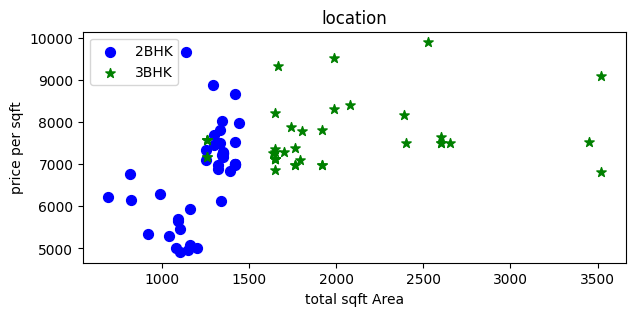

In [353]:
plot_scatter(df8,'Hebbal')

**Frequency of the Price_Per_sqft using Histogram**

Text(0, 0.5, 'count')

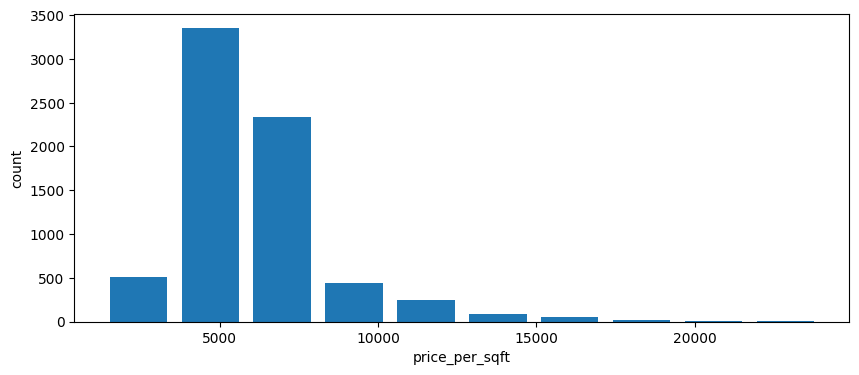

In [384]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,4)
plt.hist(df8.price_per_sqft, rwidth= 0.8)
plt.xlabel("price_per_sqft")
plt.ylabel('count')

**Dropping the 'size' and PPS, as we have used it efficiently to extract the feature 'bhk' and to remove the PPS outliers corresponding to variations in 'bhk'**

In [355]:
df9 = df8.drop(['size','price_per_sqft'], axis = 'columns')

One Hot Encoding Technique -- to get Dummies in order to work with Categorical Data. 

In [356]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Running Away from the Dummy Varible Trap by dropping the 'other' Column**

In [357]:
df10 = pd.concat([df9,dummies.drop('other',axis ='columns')], axis = 'columns')

In [358]:
df10.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [359]:
df11 = df10.drop('location', axis = 'columns')

**OUR DATA IS READY FOR THE MODEL BUILDING**

In [360]:
df11.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [361]:
df11.shape

(7033, 242)

**Independent Features**

In [362]:
x = df11.drop('price', axis = 'columns')

In [363]:
x.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**The Dependent or the Target**

In [364]:
y = df11.price

In [365]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [366]:
len(y)

7033

In [367]:
import sklearn

**Splitting the Data into Training and the Test Set**

In [368]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 10)

**Welcome 'Linear Regression'**

The Efficiency of the 'Model' is shown below

In [369]:
from sklearn.linear_model import LinearRegression
lin_clf = LinearRegression()
lin_clf.fit(x_train,y_train)
lin_clf.score(x_test,y_test)

0.8519270689717003

***To Fold the Data Set into 5 splits and Shuffle to Check how accurate the Model will be when we ingest the New Data. ***

In [370]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),x,y,cv = cv)

array([0.87945059, 0.83498576, 0.87628751, 0.79841124, 0.80706863])

***'Hyper Parameter Tuning' ***

"Who is the Winner"

Linear or
Lasso or Decision Tree


***The Beautiful Scikit Learn Library to perform the Hyper Parameter Tuning - GridSearchCV, which Selects Model based on the Parameters and the Score ***

In [371]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.839241,{'fit_intercept': True}
1,lasso,0.695406,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.743497,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Linear Is the 'Winner' from the above result**

In [372]:
df11.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Predict the Price of the specific Location with no.of.bathrooms, balcony, bhk,sqft by peering the Value through Location Index**

In [373]:
def predict_price(location,sqft,bath,balcony,bhk):
    loc_index = np.where(x.columns==location)[0][0]

    X= np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = balcony
    X[3] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    # Convert X to a Pandas DataFrame with feature names
    X_df = pd.DataFrame([X], columns=x.columns)

    return lin_clf.predict(X_df)[0]

In [374]:
predict_price('1st Phase JP Nagar',1200,2,3,2)

103.15685118539108

In [375]:
!pwd

/content


In [376]:
import pickle 
with open('bangalore_house_price_pred.pickle','wb') as f:
  pickle.dump(lin_clf,f)

In [377]:
import json
columns = { 
    'data_columns' : [col.lower() for col in x.columns] }
with open('columns.jason', 'w') as f:
  f.write(json.dumps(columns))
      

In [378]:
!ls /content

bangalore_house_price_pred.pickle  columns.jason
Bengaluru_House_Data.csv	   sample_data
